In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel(r"E:\Pending Assignments\Ensemble_Techniques_Problem Statement\Datasets_ET\Coca_Rating_Ensemble.xlsx")
df

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   object 
 1   Name              1795 non-null   object 
 2   REF               1795 non-null   int64  
 3   Review            1795 non-null   int64  
 4   Cocoa_Percent     1795 non-null   float64
 5   Company_Location  1795 non-null   object 
 6   Rating            1795 non-null   float64
 7   Bean_Type         1794 non-null   object 
 8   Origin            1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [3]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Company', 'Name', 'Company_Location', 'Bean_Type', 'Origin']

In [4]:
for var in categorical_features:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Company  contains  416  labels
Name  contains  1039  labels
Company_Location  contains  60  labels
Bean_Type  contains  42  labels
Origin  contains  101  labels


In [5]:
lb = LabelEncoder()

for i in categorical_features:
    df[i] = lb.fit_transform(df[i])

In [6]:
df.head()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,0,14,1876,2016,0.63,18,3.75,40,67
1,0,492,1676,2015,0.70,18,2.75,40,77
2,0,67,1676,2015,0.70,18,3.00,40,77
3,0,15,1680,2015,0.70,18,3.50,40,77
4,0,809,1704,2015,0.70,18,3.50,40,55


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   int32  
 1   Name              1795 non-null   int32  
 2   REF               1795 non-null   int64  
 3   Review            1795 non-null   int64  
 4   Cocoa_Percent     1795 non-null   float64
 5   Company_Location  1795 non-null   int32  
 6   Rating            1795 non-null   float64
 7   Bean_Type         1795 non-null   int32  
 8   Origin            1795 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 91.3 KB


In [8]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Company', 'Name', 'REF', 'Review', 'Cocoa_Percent', 'Company_Location',
       'Rating', 'Bean_Type', 'Origin'],
      dtype='object')>

# **Bagging**

In [9]:
df['Cocoa_Percent'] = df['Cocoa_Percent'] *100
df['Cocoa_Percent'] = df['Cocoa_Percent'].astype(int)

In [10]:
df['Cocoa_Percent']

0       63
1       70
2       70
3       70
4       70
        ..
1790    70
1791    65
1792    65
1793    62
1794    65
Name: Cocoa_Percent, Length: 1795, dtype: int32

In [11]:
# Input and Output Split
predictors =df.loc[:, df.columns!='Cocoa_Percent']
type(predictors)

pandas.core.frame.DataFrame

In [12]:
target = df['Cocoa_Percent']
type(target)

pandas.core.series.Series

In [13]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

In [14]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier

In [15]:

bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

In [16]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=1, random_state=42)

In [17]:

from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
# Evaluation on Testing Data
confusion_matrix(y_test, bag_clf.predict(x_test))
acc_test = accuracy_score(y_test, bag_clf.predict(x_test))

In [19]:
# Evaluation on Training Data

acc_train = accuracy_score(y_train, bag_clf.predict(x_train))

In [20]:
confusion_matrix(y_train, bag_clf.predict(x_train))

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0, 15]], dtype=int64)

In [21]:
results = pd.DataFrame([['BaggingClassifier', acc_train,acc_test]],columns = ['Model', 'Accuracy test','Accuracy train'])
results

,Model,Accuracy test,Accuracy train
0,BaggingClassifier,0.993036,0.445682


# **Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [23]:
confusion_matrix(y_test, boost_clf.predict(x_test))
accuracy_score(y_test, boost_clf.predict(x_test))

0.4233983286908078

In [24]:
# Hyperparameters
boost_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)
boost_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [25]:

# Evaluation on Testing Data
confusion_matrix(y_test, boost_clf2.predict(x_test))
acc_test =accuracy_score(y_test, boost_clf2.predict(x_test))

In [26]:
# Evaluation on Training Data
acc_train = accuracy_score(y_train, boost_clf2.predict(x_train))

In [27]:
model_results = pd.DataFrame([['"GradientBoostingClassifier', acc_test,acc_train]],
            columns = ['Model', 'Accuracy test','Accuracy train'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy test,Accuracy train
0,BaggingClassifier,0.993036,0.445682
1,"""GradientBoostingClassifier",0.406685,0.481198


## **XGBoosting**

In [28]:
import xgboost as xgb

In [29]:
xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

In [30]:
xgb_clf.fit(x_train, y_train)

C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6, max_depths=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))
accuracy_score(y_test, xgb_clf.predict(x_test))

0.43454038997214484

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

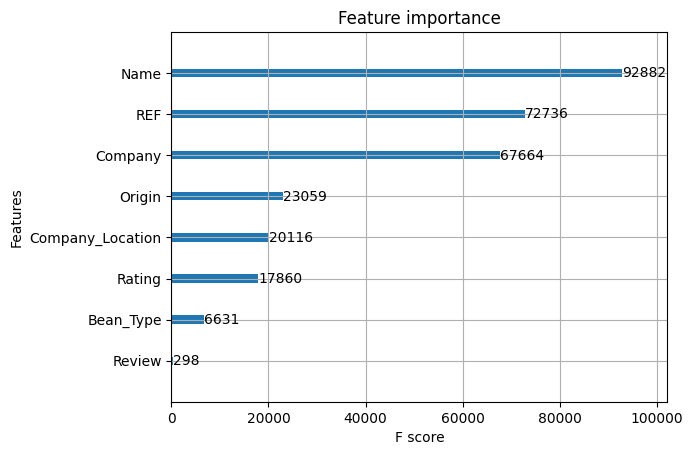

In [32]:

xgb.plot_importance(xgb_clf)

## **Adaboosting**

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:

ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [43]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [46]:
# Evaluation on Testing Data
confusion_matrix(y_test, ada_clf.predict(x_test))
acc_test = accuracy_score(y_test, ada_clf.predict(x_test))

In [47]:
# Evaluation on Training Data
acc_train = accuracy_score(y_train, ada_clf.predict(x_train))

In [49]:
model_results1 = pd.DataFrame([['Adaboosting', acc_test,acc_train]],
            columns = ['Model', 'Accuracy test','Accuracy train'])
results = results.append(model_results1, ignore_index = True)
results

,Model,Accuracy test,Accuracy train
0,BaggingClassifier,0.993036,0.445682
1,"""GradientBoostingClassifier",0.406685,0.481198
2,"""GradientBoostingClassifier",0.072423,0.066852
3,Adaboosting,0.072423,0.066852
